# Building a Neural Network with NENGO

#### Boris Nzaramba & Ali Haidar

The objective of this notebook is to see how we can build a neural network model using NENGO neural simulator, and train it to compute an arbitrary function:
### f(x,y,z)=(2x+1)/y^2+(cos(z))^2

The NENGO API is object based, meaning that it defines six core obects or components that are connectable to describe a neural network model. This makes it easy to document, test, and modify the model, as well as running simulations on other simulators than the NENGO incorporated one. It allows to make very large and complex models. Furthermore, this approach comes with a graphical representation of your model, as NENGO also provides a GUI.

We will be using the six core objects to build our model:
###### A "Node" represents an input or output
###### An "Ensemble" contains a group of neurons that encodes a time-varying vector of real numbers
###### A "Connection" describes how nodes (inputs) and ensembles (groups of neurons) are connected
###### A "Probe" gathers data during a simulation for analysis
###### A "Network" encapsulates a functionally related group of interconnected nodes and ensembles
###### A "Model" encapsulates a NENGO model


For this notebook, you will need to install the following packages, if not already done. Type in the following commands in your command line interpreter:
    
    pip install matplotlib   -usefull to plot graphs
    pip install numpy        -provides usefull math functions
    pip install nengo        -nengo package
    pip install nengo_dl     -nengo simulator. Takes a nengo network as input
    pip install tensorflow   -provides a wide range of optimization methods to find the best                               parameters for our model. Think of the function to minimize the error

In [1]:
%matplotlib inline

import nengo
import nengo_dl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
#We start off with creating a network named "function"
net = nengo.Network(label="function")


Next, we want to define what will be the inputs x, y and z. These can be arbitrary and we will use white noise signals in this case.

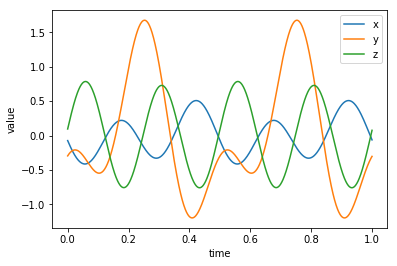

In [17]:
#We create three input nodes for x, y, z and assign them a white noise generated with nengo.processes
with net:
    x, y, z = [nengo.Node(nengo.processes.WhiteSignal(0.5, 5, seed=s))for s in range(3)]
    
#The matplot package can give us a graphical representation of the signals [OPTIONAL]  
plt.figure()
plt.plot(np.linspace(0 ,1, 1000), x.output.run(1.0), label='x')
plt.plot(np.linspace(0 ,1, 1000), y.output.run(1.0), label='y')
plt.plot(np.linspace(0 ,1, 1000), z.output.run(1.0), label='z')
plt.xlabel("time")
plt.ylabel("value")
plt.legend();
